In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import *
from sklearn.linear_model import LinearRegression

In [34]:
ganges = pd.read_csv('../Data/Ganges.csv',index_col=3,header=0,parse_dates=True)
dates = (ganges.Year > 1984) & (ganges.Year<2017)
ganges = ganges[dates]
#ganges = ganges.reset_index()
#ganges = ganges[ (ganges.Month > 4) & (ganges.Month<10)]
#print (list(ganges))
#print (ganges.index)  
columns = ['Q (m3/s)',]
data = ganges[columns]

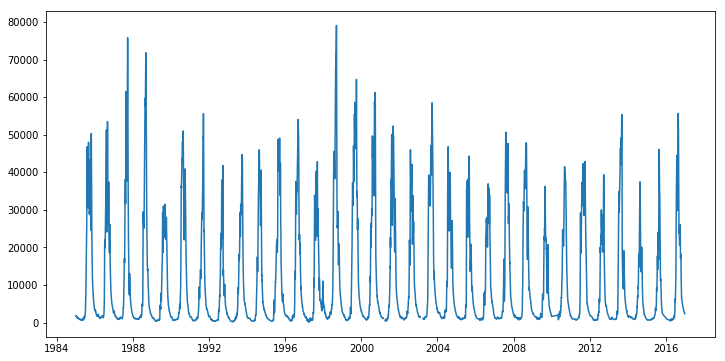

In [35]:
plt.figure(figsize = (12,6))
plt.plot(data)

In [36]:
test_period = 3825

train = data.iloc[:-test_period]
test = data.iloc[-test_period:]

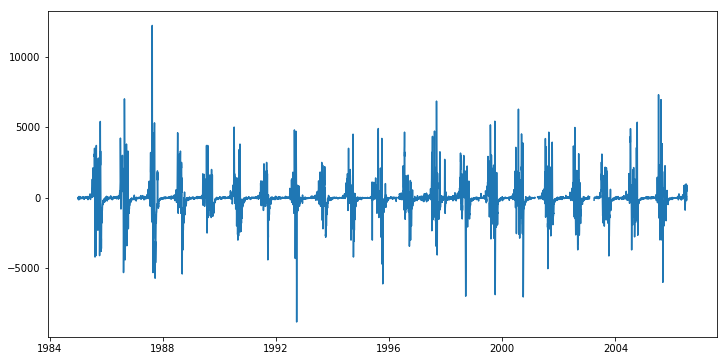

In [38]:
trend_removed = train.diff()
plt.figure(figsize = (12,6))
plt.plot(trend_removed)

(7863, 1)
(7863, 1)


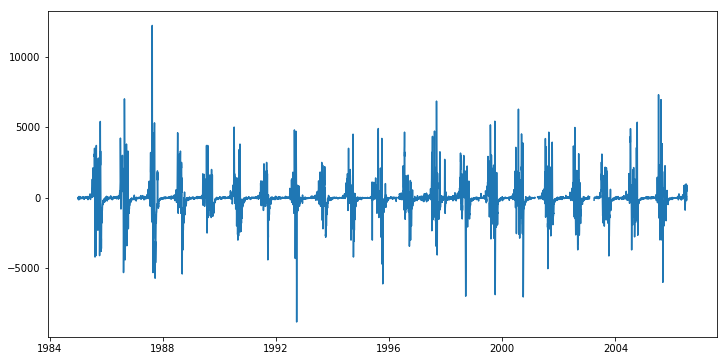

In [47]:
t_train = np.arange(len(train)).reshape(-1,1)
print(t_train.shape)
print(trend_removed.shape)
trend_removed = trend_removed / ((t_train+1)**(1/2))

plt.figure(figsize = (12,6))
plt.plot(trend_removed)

In [51]:
n_bins = 10
bins = np.linspace(trend_removed.min(), trend_removed.max(), n_bins)
binned = np.digitize(trend_removed, bins)
binned = binned[:,0]
binned_series = pd.Series(binned, index = trend_removed.index)

In [87]:
print bins
print (trend_removed.iloc[1,0])
print (binned[1])
#print trend_removed.index

[-8800.         -6466.66666667 -4133.33333333 -1800.
   533.33333333  2866.66666667  5200.          7533.33333333
  9866.66666667 12200.        ]
-40.0
4


In [52]:
bin_means = {}

for binn in range(1,n_bins+1):
    bin_means[binn] = trend_removed[binned == binn].mean()

In [53]:
lagged_list = []
for s in range(13):
    lagged_list.append(binned_series.shift(s))
    
lagged_frame = pd.concat(lagged_list,1).dropna()

train_X = lagged_frame.iloc[:,1:]
train_y = lagged_frame.iloc[:,0]

In [54]:
train_X.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
1985-01-13,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,10.0
1985-01-14,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1985-01-15,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1985-01-16,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1985-01-17,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [55]:
train_y.head()

Date
1985-01-13    4
1985-01-14    4
1985-01-15    4
1985-01-16    4
1985-01-17    4
Name: 0, dtype: int64

In [56]:
def get_mean_from_class(prediction):
    
    return(bin_means[prediction[0]])

In [57]:
model = GaussianNB()

In [58]:
model.fit(train_X, train_y)

GaussianNB(priors=None)

In [63]:
pred_insample = model.predict(train_X)
pred_insample = pd.DataFrame(pred_insample, index = train_y.index)

rp = np.empty((len(pred_insample),1), int)
print (type(pred_insample))
print (type(pred_insample.values))
for row in range(len(pred_insample)):
    rp[row] = get_mean_from_class(pred_insample.values[row])
resulting_prediction = pd.Series(rp[:,0], index = train_y.index)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


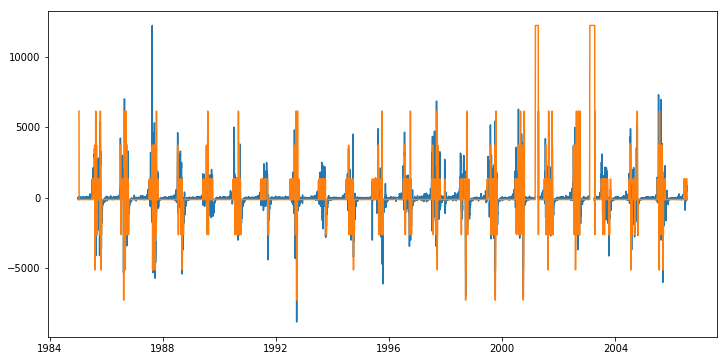

In [64]:
plt.figure(figsize = (12,6))
plt.plot(trend_removed)
plt.plot(resulting_prediction)

In [67]:
prediction_frame = pd.DataFrame(np.nan, index = test.index, columns = range(train_X.shape[1]))

predi = np.empty((len(test),1), int)
prediction_frame.iloc[0,1:] = train_X.iloc[-1,:-1].values
prediction_frame.iloc[0,0] = train_y.iloc[-1]

In [70]:
for i in range(len(test)):
    pred = model.predict(prediction_frame.iloc[i,:].values.reshape(1,-1))
    pred_num = get_mean_from_class(pred.reshape(-1))
    predi[i] = pred_num
    try:
        prediction_frame.iloc[i+1,1:] = prediction_frame.iloc[i,:-1].values
        prediction_frame.iloc[i+1,0] = pred[0]
    except:
        pass
predictions = pd.Series(predi[:,0],index = test.index)

In [76]:
trend_test = np.arange(len(train),len(train)+len(test)).reshape(-1,1)
print(trend_test.shape)
final_prediction = predictions.cumsum()* ((trend_test+1)**(1/2)).reshape(-1)+train.iloc[-1]

(3825, 1)


In [75]:
plt.figure(figsize = (12,6))
plt.plot(test)
print final_prediction
plt.plot(final_prediction)

2006-07-13 00:00:00   NaN
2006-07-14 00:00:00   NaN
2006-07-15 00:00:00   NaN
2006-07-16 00:00:00   NaN
2006-07-17 00:00:00   NaN
2006-07-18 00:00:00   NaN
2006-07-19 00:00:00   NaN
2006-07-20 00:00:00   NaN
2006-07-21 00:00:00   NaN
2006-07-22 00:00:00   NaN
2006-07-23 00:00:00   NaN
2006-07-24 00:00:00   NaN
2006-07-25 00:00:00   NaN
2006-07-26 00:00:00   NaN
2006-07-27 00:00:00   NaN
2006-07-28 00:00:00   NaN
2006-07-29 00:00:00   NaN
2006-07-30 00:00:00   NaN
2006-07-31 00:00:00   NaN
2006-08-01 00:00:00   NaN
2006-08-02 00:00:00   NaN
2006-08-03 00:00:00   NaN
2006-08-04 00:00:00   NaN
2006-08-05 00:00:00   NaN
2006-08-06 00:00:00   NaN
2006-08-07 00:00:00   NaN
2006-08-08 00:00:00   NaN
2006-08-09 00:00:00   NaN
2006-08-10 00:00:00   NaN
2006-08-11 00:00:00   NaN
                       ..
2016-12-03 00:00:00   NaN
2016-12-04 00:00:00   NaN
2016-12-05 00:00:00   NaN
2016-12-06 00:00:00   NaN
2016-12-07 00:00:00   NaN
2016-12-08 00:00:00   NaN
2016-12-09 00:00:00   NaN
2016-12-10 0

AttributeError: 'str' object has no attribute 'toordinal'

Error in callback <function post_execute at 0x7f2c6fc76cf8> (for post_execute):


ValueError: view limit minimum -0.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 864x432 with 1 Axes>

In [ ]:
np.sqrt(np.mean((test-final_prediction)**2))